In [119]:
import pandas as pd
import numpy as np

In [120]:
crime = pd.read_hdf('../data/crime.h5', 'crime')
crime.head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,traffic-accident-dui-duid,traffic-accident,2014-06-29 02:01:00,-105.000149,39.745753,cbd,0,1
1,vehicular-eluding-no-chase,all-other-crimes,2014-06-29 01:54:00,-104.884660,39.738702,east-colfax,1,0
2,disturbing-the-peace,public-disorder,2014-06-29 02:00:00,-105.020719,39.706674,athmar-park,1,0
3,curfew,public-disorder,2014-06-29 02:18:00,-105.001552,39.769505,sunnyside,1,0
4,aggravated-assault,aggravated-assault,2014-06-29 04:17:00,-105.018557,39.679229,college-view-south-platte,1,0


In [121]:
# wd_counts = crime['REPORTED_DATE'].dt.weekday_name \
#  .value_counts()
#weekday_name is replaced by day_name why

In [122]:
wd_counts = crime['REPORTED_DATE'].dt.day_name().value_counts()
wd_counts

Monday       70024
Friday       69621
Wednesday    69538
Thursday     69287
Tuesday      68394
Saturday     58834
Sunday       55213
Name: REPORTED_DATE, dtype: int64

In [123]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday',
'Friday', 'Saturday', 'Sunday']


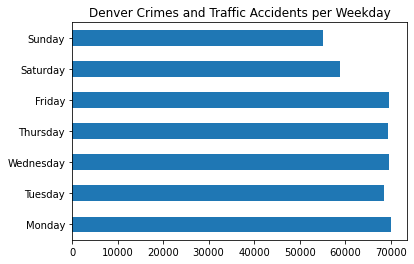

In [124]:
title = 'Denver Crimes and Traffic Accidents per Weekday'
wd_counts.reindex(days).plot(kind='barh', title=title)

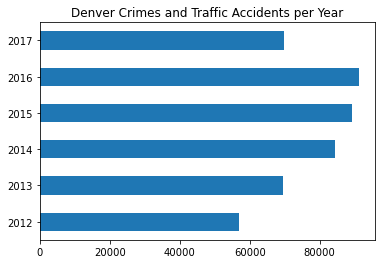

In [125]:
title = 'Denver Crimes and Traffic Accidents per Year'
crime['REPORTED_DATE'].dt.year.value_counts() \
 .sort_index() \
 .plot(kind='barh', title=title)

In [126]:
weekday = crime['REPORTED_DATE'].dt.day_name()
weekday.head()

0    Sunday
1    Sunday
2    Sunday
3    Sunday
4    Sunday
Name: REPORTED_DATE, dtype: object

In [127]:
year = crime['REPORTED_DATE'].dt.year
year.head()

0    2014
1    2014
2    2014
3    2014
4    2014
Name: REPORTED_DATE, dtype: int64

In [128]:
crime.head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,traffic-accident-dui-duid,traffic-accident,2014-06-29 02:01:00,-105.000149,39.745753,cbd,0,1
1,vehicular-eluding-no-chase,all-other-crimes,2014-06-29 01:54:00,-104.884660,39.738702,east-colfax,1,0
2,disturbing-the-peace,public-disorder,2014-06-29 02:00:00,-105.020719,39.706674,athmar-park,1,0
3,curfew,public-disorder,2014-06-29 02:18:00,-105.001552,39.769505,sunnyside,1,0
4,aggravated-assault,aggravated-assault,2014-06-29 04:17:00,-105.018557,39.679229,college-view-south-platte,1,0


In [129]:
crime_wd_y = crime.groupby([year, weekday]).size()
crime_wd_y

REPORTED_DATE  REPORTED_DATE
2012           Friday            8549
               Monday            8786
               Saturday          7442
               Sunday            7189
               Thursday          8440
               Tuesday           8191
               Wednesday         8440
2013           Friday           10380
               Monday           10627
               Saturday          8875
               Sunday            8444
               Thursday         10431
               Tuesday          10416
               Wednesday        10354
2014           Friday           12683
               Monday           12813
               Saturday         10950
               Sunday           10278
               Thursday         12309
               Tuesday          12440
               Wednesday        12948
2015           Friday           13273
               Monday           13452
               Saturday         11586
               Sunday           10624
               Thursd

In [130]:
crime_table = crime_wd_y.rename_axis(['Year', 'Weekday']) 
crime_table.head()

Year  Weekday 
2012  Friday      8549
      Monday      8786
      Saturday    7442
      Sunday      7189
      Thursday    8440
dtype: int64

In [131]:
crime_table.unstack('Weekday')

Weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Year,,,,,,,
2012,8549,8786,7442,7189,8440,8191,8440
2013,10380,10627,8875,8444,10431,10416,10354
2014,12683,12813,10950,10278,12309,12440,12948
2015,13273,13452,11586,10624,13512,13381,13320
2016,14059,13708,11467,10554,14050,13338,13900
2017,10677,10638,8514,8124,10545,10628,10576


In [132]:
criteria = crime['REPORTED_DATE'].dt.year == 2017

In [133]:
criteria.head()

0    False
1    False
2    False
3    False
4    False
Name: REPORTED_DATE, dtype: bool

In [134]:
crime.head(3)

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,traffic-accident-dui-duid,traffic-accident,2014-06-29 02:01:00,-105.000149,39.745753,cbd,0,1
1,vehicular-eluding-no-chase,all-other-crimes,2014-06-29 01:54:00,-104.884660,39.738702,east-colfax,1,0
2,disturbing-the-peace,public-disorder,2014-06-29 02:00:00,-105.020719,39.706674,athmar-park,1,0


In [135]:
crime.loc[criteria, 'REPORTED_DATE'].dt.dayofyear.max()

272

In [136]:
crime_pct = crime['REPORTED_DATE'].dt.dayofyear.le(272) \
.groupby(year) \
.mean() \
.round(3)

In [137]:
crime_pct

REPORTED_DATE
2012    0.748
2013    0.725
2014    0.751
2015    0.748
2016    0.752
2017    1.000
Name: REPORTED_DATE, dtype: float64

In [138]:
crime_pct.loc[2012:2016].median()

0.748

In [139]:
crime_table.loc[2017] = crime_table.loc[2017].div(.748) \
 .astype('int')

In [140]:
crime_table.head()

Year  Weekday 
2012  Friday      8549.0
      Monday      8786.0
      Saturday    7442.0
      Sunday      7189.0
      Thursday    8440.0
dtype: float64

In [141]:
#crime_table = crime_table.reindex(columns=days) reindex + columns doesn't work

In [142]:
# import seaborn as sns
# sns.heatmap(crime_table, cmap='Greys')

In [143]:
denver_pop = pd.read_csv('../data/denver_pop.csv',
 index_col='Year')

In [144]:
denver_pop.head()

,Population
Year,
2017,705000
2016,693000
2015,680000
2014,662000
2013,647000


In [145]:
den_100k.isna().sum()

0

In [146]:
crime_table.dropna(inplace = True)

In [147]:
den_100k = denver_pop.div(100000).squeeze()
crime_table2 = crime_table.div(den_100k, axis='index') \
 .astype('int')

In [149]:
crime_table2.head()

Year  Weekday 
2012  Friday      1348
      Monday      1385
      Saturday    1173
      Sunday      1133
      Thursday    1331
dtype: int32

In [151]:
# sns.heatmap(crime_table2, cmap='Greys')  error with shape why

In [152]:
wd_counts.loc[days]

Monday       70024
Tuesday      68394
Wednesday    69538
Thursday     69287
Friday       69621
Saturday     58834
Sunday       55213
Name: REPORTED_DATE, dtype: int64

In [153]:
crime['REPORTED_DATE'].dt.dayofyear.le(272)

0         True
1         True
2         True
3         True
4         True
          ... 
460906    True
460907    True
460908    True
460909    True
460910    True
Name: REPORTED_DATE, Length: 460911, dtype: bool

In [154]:
crime_table / den_100k

Year  Weekday  
2012  Friday       1348.422713
      Monday       1385.804416
      Saturday     1173.817035
      Sunday       1133.911672
      Thursday     1331.230284
      Tuesday      1291.955836
      Wednesday    1331.230284
2013  Friday       1604.327666
      Monday       1642.503864
      Saturday     1371.715611
      Sunday       1305.100464
      Thursday     1612.210201
      Tuesday      1609.891808
      Wednesday    1600.309119
2014  Friday       1915.861027
      Monday       1935.498489
      Saturday     1654.078550
      Sunday       1552.567976
      Thursday     1859.365559
      Tuesday      1879.154079
      Wednesday    1955.891239
2015  Friday       1951.911765
      Monday       1978.235294
      Saturday     1703.823529
      Sunday       1562.352941
      Thursday     1987.058824
      Tuesday      1967.794118
      Wednesday    1958.823529
2016  Friday       2028.715729
      Monday       1978.066378
      Saturday     1654.689755
      Sunday       1522

----------------
      Population
Year            
2017      705000
2016      693000
2015      680000
2014      662000
2013      647000
----------------
Year
2017    7.05
2016    6.93
2015    6.80
2014    6.62
2013    6.47
Name: Population, dtype: float64
----------------
REPORTED_DATE  Friday  Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday
2012               71      95        78      76        76       72         72
2013               65      85        68      67        69       74         74
2014               76      94        67      67        70       76         72
2015               92     108        85      78       101      102         89
2016               97     119        86      85        99      102        100
-----------------
REPORTED_DATE  Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  Sunday
2012               95       72         72        76      71        78      76
2013               85       74         74        69      65        68      67
2014   

REPORTED_DATE,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
2012,95,72,72,76,71,78,76
2013,85,74,74,69,65,68,67
2014,94,76,72,70,76,67,67
2015,108,102,89,101,92,85,78
2016,119,102,100,99,97,86,85
2017,114,118,111,106,111,91,102


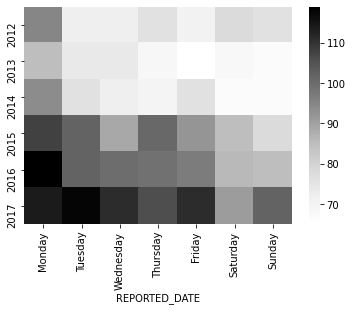

In [162]:
ADJ_2017 = .748
def count_crime(df, offense_cat):
    df = df[df['OFFENSE_CATEGORY_ID'] == offense_cat]
    weekday = df['REPORTED_DATE'].dt.day_name()
    year = df['REPORTED_DATE'].dt.year
    ct = df.groupby([year, weekday]).size().unstack()
    ct.loc[2017] = ct.loc[2017].div(ADJ_2017).astype('int')
    pop = pd.read_csv('../data/denver_pop.csv', index_col='Year')
    print("----------------")
    print(pop.head())
    pop = pop.squeeze().div(100000)
    print("----------------")
    print(pop.head())
    ct = ct.div(pop, axis=0).astype('int')
    print("----------------")
    print(ct.head())
    ct = ct.reindex(columns=days)
    print('-----------------')
    print(ct.head())
    sns.heatmap(ct, cmap='Greys')
    return ct

count_crime(crime, 'auto-theft')